<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Final Project Programming for Data Science
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Asking + Preprocessing + Analyzing data to answer each question</div>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Read data from CSV file

In [2]:
udemy_df = pd.read_csv('./Data/udemy.csv', parse_dates=['published_time', 'last_update_date'])
udemy_df.head(10)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75000,134.0,42.0,37.0,1268.0,2010-08-05 22:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50000,709.0,112.0,9.0,88.0,2010-01-12 18:09:46,NaT,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40000,41.0,13.0,14.0,82.0,2010-10-13 18:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80000,395.0,88.0,36.0,1511.0,2011-06-20 20:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75000,38.0,12.0,38.0,569.0,2011-06-23 18:31:20,NaT,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/
5,8139.0,14-Day Yoga Detox and Empowerment Course,True,29.99,"Lose weight, get healthier and fit on all leve...",20505.0,4.53012,796.0,135.0,31.0,1163.0,2011-07-15 04:13:24,2018-05-22,Health & Fitness,Yoga,Yoga,English,/course/yoga-for-weight-loss-and-core-strength...,Sadie Nardini,/user/sadienardini/
6,2762.0,Simple Strategy for Swing Trading the Stock Ma...,True,39.99,Use my favorite Technical Indicator and the Tr...,3309.0,3.85000,958.0,241.0,8.0,80.0,2010-04-14 16:32:46,2019-03-07,Finance & Accounting,Investing & Trading,Swing Trading,English,/course/swing-trading-the-stock-market/,Tom Watson,/user/tomwatson/
7,8082.0,Ruby Programming for Beginners,True,74.99,Learn Ruby Programming the fast and easy way!,28824.0,4.00000,741.0,189.0,56.0,363.0,2011-07-08 21:32:55,2022-09-26,Development,Programming Languages,Ruby,English,/course/learn-ruby-programming-in-ten-easy-steps/,Huw Collingbourne,/user/huwcollingbourne/
8,8075.0,How to Create an Awesome Demo Video for Your B...,True,149.99,You don't need to spend $10K in order to have ...,10761.0,3.90000,349.0,101.0,87.0,526.0,2011-07-06 14:06:34,2020-11-22,Business,Media,Demo Video,English,/course/how-to-create-awesome-demo-videos/,Miguel Hernandez,/user/miguelhernandez/
9,8069.0,Curso SEO Online,True,99.99,Curso SEO práctico. Aprenda a posicionar su si...,483.0,4.65000,100.0,45.0,73.0,373.0,2012-07-03 17:03:28,2020-02-28,Marketing,Search Engine Optimization,SEO,Spanish,/course/curso-de-posicionamiento-en-buscadores...,Juan Jose Ramos,/user/juanjo-ramos/


In [3]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  float64       
 1   title               209734 non-null  object        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float64       
 4   headline            209707 non-null  object        
 5   num_subscribers     209734 non-null  float64       
 6   avg_rating          209734 non-null  float64       
 7   num_reviews         209734 non-null  float64       
 8   num_comments        209734 non-null  float64       
 9   num_lectures        209734 non-null  float64       
 10  content_length_min  209734 non-null  float64       
 11  published_time      209734 non-null  datetime64[ns]
 12  last_update_date    209597 non-null  datetime64[ns]
 13  category            209734 no

## Question 1: How importance does the price play?

### Benefits of finding the answer: 
- Knowing the importance of price helps businesses optimize their pricing strategy. They can determine whether customers are highly sensitive to price changes and adjust their pricing models accordingly.
- Understanding the role of price allows businesses to position themselves competitively in the market. If price is a significant factor for customers, a company may choose to compete on price or differentiate itself through other means.
- Price elasticity insights help businesses set prices that maximize revenue. If customers are willing to pay higher prices for a product or service, companies can capture additional value.
- Understanding price sensitivity allows businesses to implement loyalty programs, discounts, or promotions strategically.
- Price elasticity insights contribute to more accurate demand forecasting. Businesses can predict how changes in price may affect demand, allowing for better inventory management and resource allocation.


## Preprocessing

- To make the data more human-readable and interpretable, especially when you're creating visualizations or summaries where it's clearer to have 'Paid' and 'Free' instead of 'True' and 'False'. It simplifies the understanding of the data and is often done for better communication.

In [4]:
df = udemy_df.copy()
df['is_paid'] = df['is_paid'].apply(lambda x: 'Free' if x == False else 'Paid')
df.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,Paid,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05 22:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,Free,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12 18:09:46,NaT,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",Paid,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13 18:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,Paid,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20 20:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,Paid,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23 18:31:20,NaT,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


### Analyze data to answer the question?

#### Percentage of paid courses and free courses

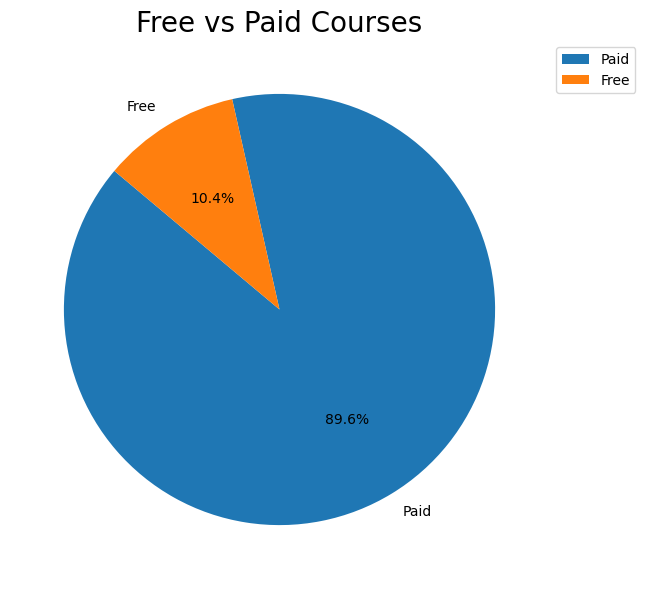

In [5]:
is_paid_distribution = df['is_paid'].value_counts()
plt.figure(figsize=(10, 7))
plt.title('Free vs Paid Courses', fontsize=20)
is_paid_distribution.plot.pie(autopct="%1.1f%%", startangle=140)
plt.ylabel('')
plt.legend(labels=is_paid_distribution.index, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

- The dataset predominantly consists of paid courses, accounting for approximately 90% of the total courses. In contrast, free courses make up the remaining 10%. This indicates that the majority of courses in the dataset require payment, while a smaller portion is available for free.

#### Trend of user in 10 latest years

- Find top 100 popular course (which has most number of subscribers) in 2012 -> 2022
- Count how many free, paid courses in top 100.

In [6]:
df['year'] = df['published_time'].dt.year

# Filter data for the past 10 years
recent_years_df = df[df['year'] >= df['year'].max() - 10]

# Group by year and select the top 100 courses for each year
top_100_by_year = recent_years_df.groupby('year').apply(lambda group: group.sort_values('num_subscribers', ascending=False).head(100))
top_100_by_year = top_100_by_year.drop(['year'], axis=1)

# Count the course types for each year
values_count_by_year = top_100_by_year.groupby(['year', 'is_paid']).size().unstack(fill_value = 0)
values_count_by_year

is_paid,Free,Paid
year,,
2012,53,47
2013,43,57
2014,48,52
2015,45,55
2016,24,76
2017,20,80
2018,20,80
2019,5,95
2020,0,100


- Visualize number of free and paid courses in top 100 popular courses for 10 latest years.

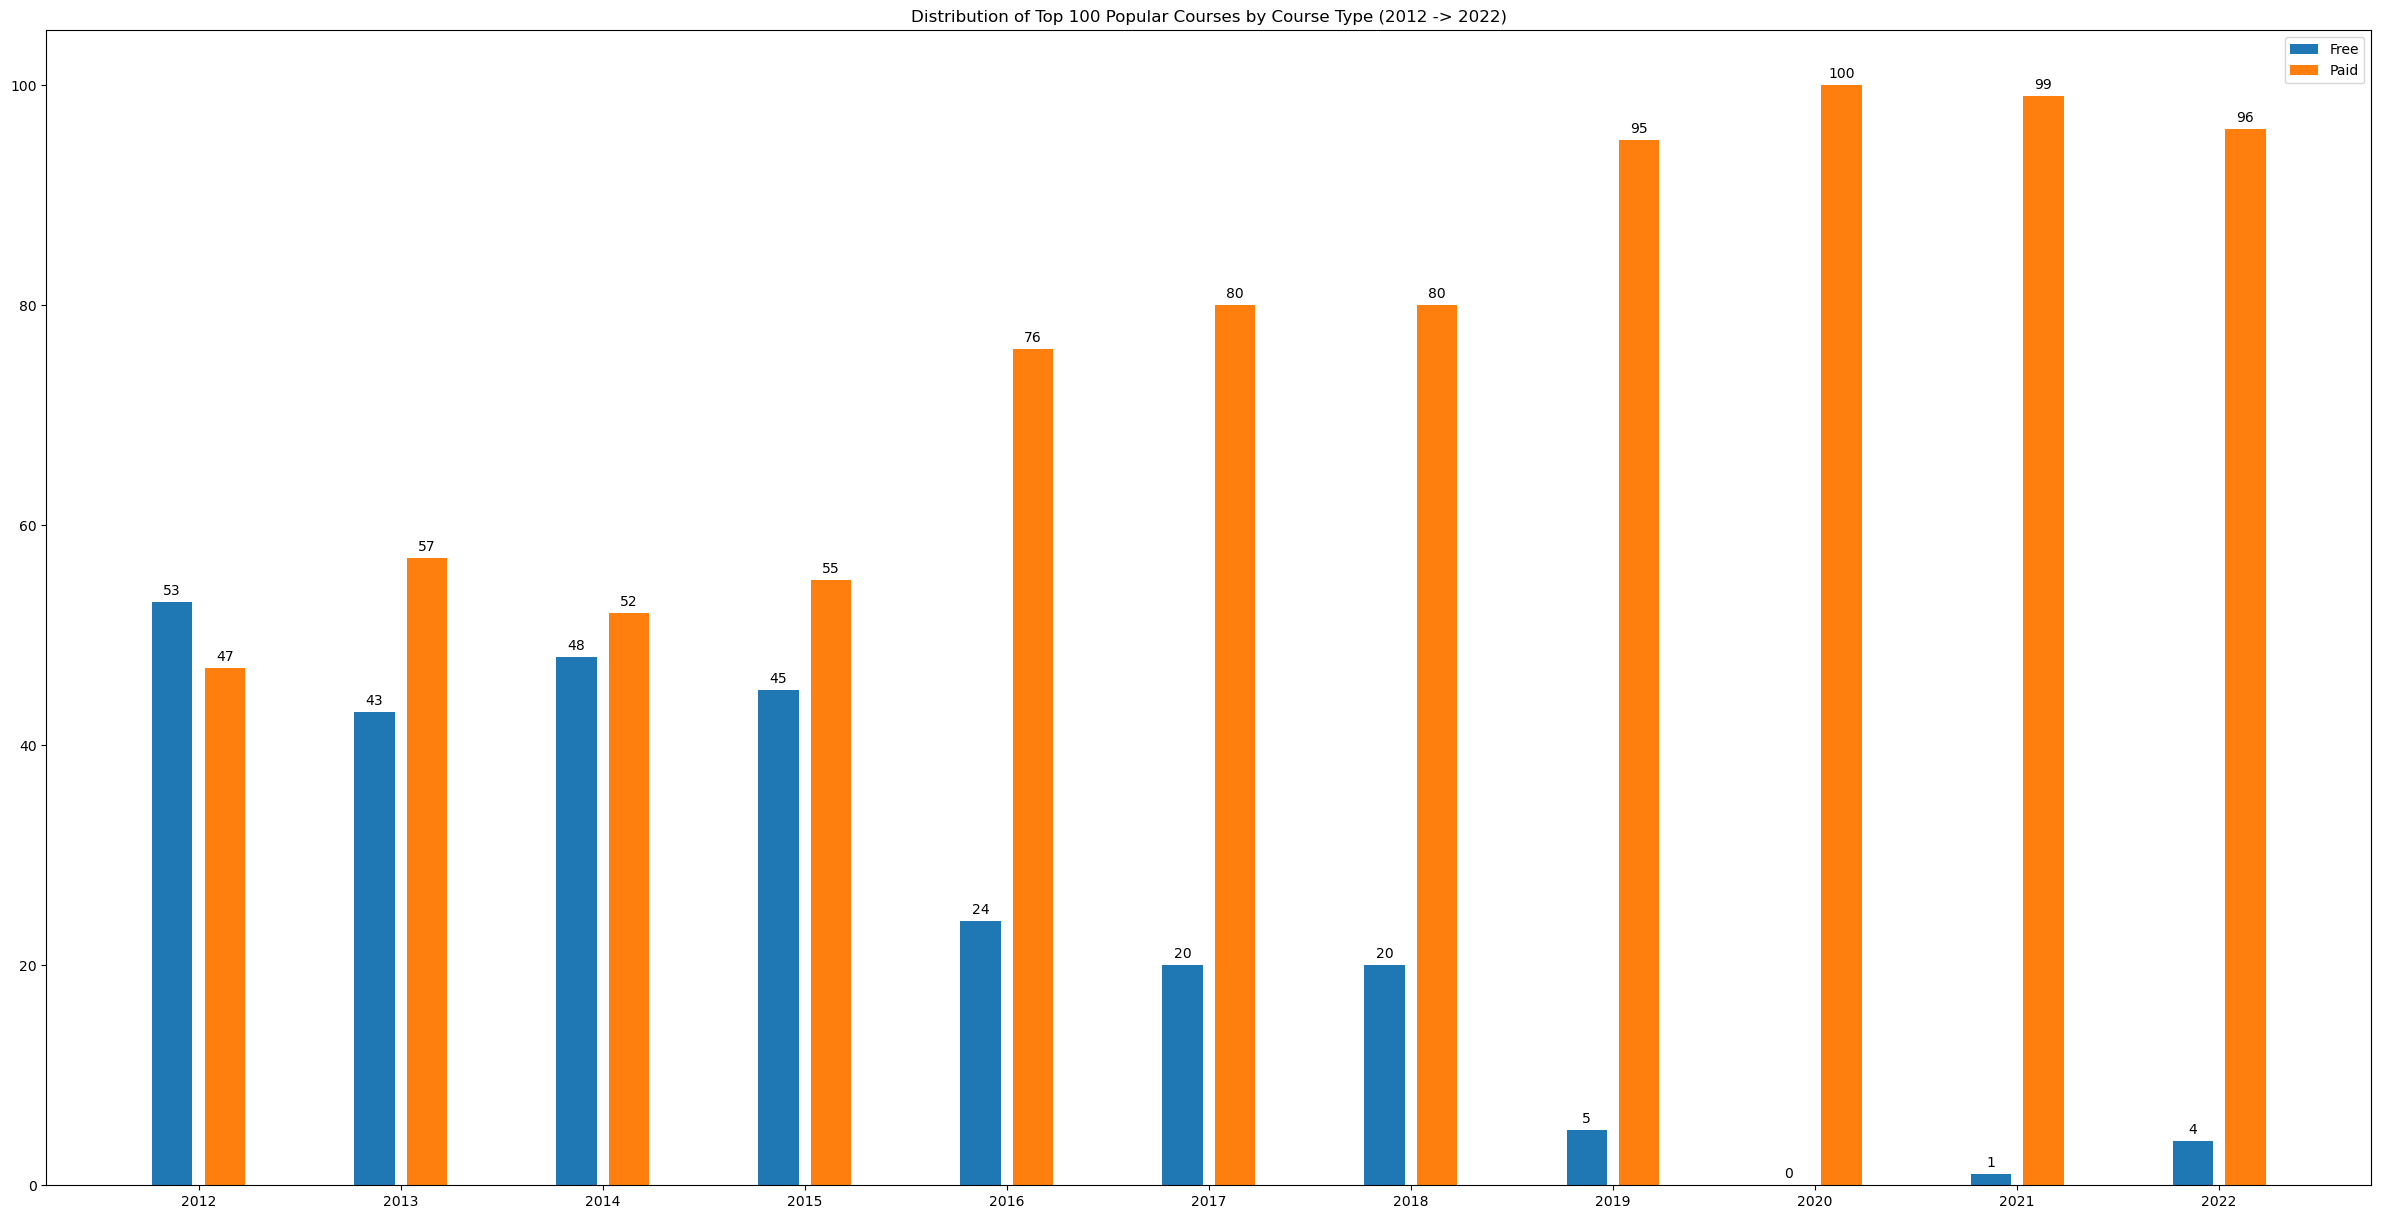

In [7]:
x = np.arange(len(values_count_by_year.index))
width = 0.2
    
fig, ax = plt.subplots(figsize=(30, 15))
rects1 = ax.bar(x - width/2 - 0.03, values_count_by_year['Free'], width, label='Free')
rects2 = ax.bar(x + width/2 + 0.03, values_count_by_year['Paid'], width, label='Paid')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_title('Distribution of Top 100 Popular Courses by Course Type (2012 -> 2022)')
ax.set_xticks(x)
ax.set_xticklabels(values_count_by_year.index)
ax.legend()
plt.show()

- Number of popular free courses is going to reduce.
- The shift towards fewer free courses could indicate an emphasis on providing higher-quality or premium content.
- I think this shift towards due to free courses have not certificate for finish so number of subcribers is going to decrease.

#### Correlation between numeric columns

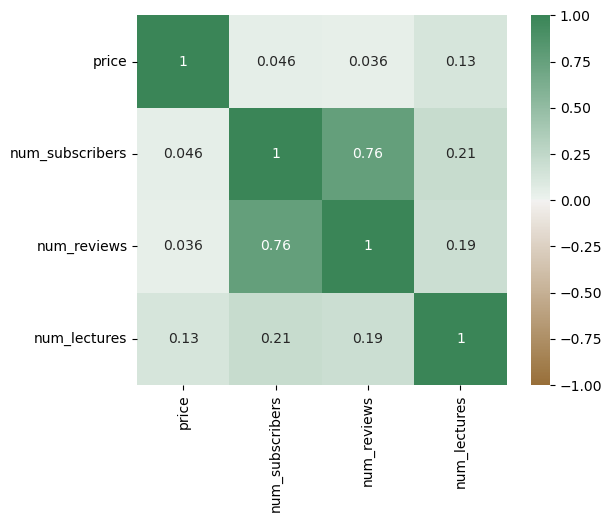

In [7]:
paid_course = df[df['is_paid'] == 'Paid']
numeric_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures']
paid_numeric_df = paid_course[numeric_cols]
corr_mat = paid_numeric_df.corr()

axis_corr = sns.heatmap(corr_mat,annot=True, vmin=-1, vmax=1,cmap=sns.diverging_palette(50, 500, n=500),square=True)
plt.show()

- Correlation between `price` and `num_subscribers` is 0.046 > 0 so if the course has high price, the number of subscribers wouldn't decrease.
- `Number of subscribers` and `number of reviews` has positive correlation like `num_lectures` and `price`


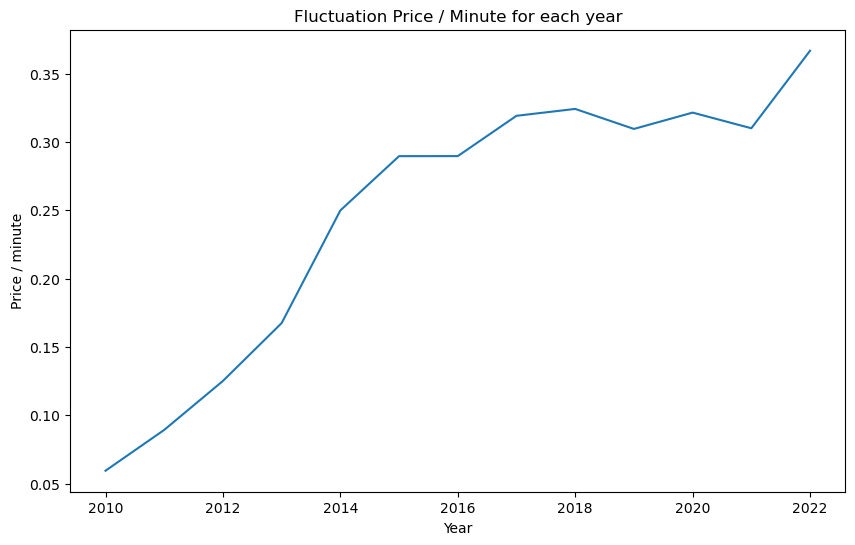

In [8]:
paid_course['year'] = paid_course['published_time'].dt.year
# Calculate the price / minute for each year
average_price_by_year = paid_course.groupby('year')['price'].sum() / paid_course.groupby('year')['content_length_min'].sum()
plt.figure(figsize=(10, 6))
average_price_by_year.plot()
plt.ylabel('Price / minute')
plt.xlabel('Year')
plt.title('Fluctuation Price / Minute for each year')
plt.show()

- The increase in the price per minute is going to increase.

**Conclusion**:
- Learners today prioritize the practical value and application of knowledge over cost considerations. This trend poses challenges for education platforms to deliver high-quality courses that meet the real needs and desires of learners.
- Contemporary learners highly value the quality of course content. They want to ensure that information is accurately conveyed, up-to-date, and practically valuable.
- Modern learners often seek courses that align with their individual goals and career development. Learning must be directly related to their areas of interest.
- The certification and credibility of a course have become crucial factors. Learners prioritize courses that provide valuable and recognized certificates in their respective fields.

## Question 2: How does profit from teaching courses on Udemy?

### Benefits of finding the answer?

### Analyze data to answer the question?

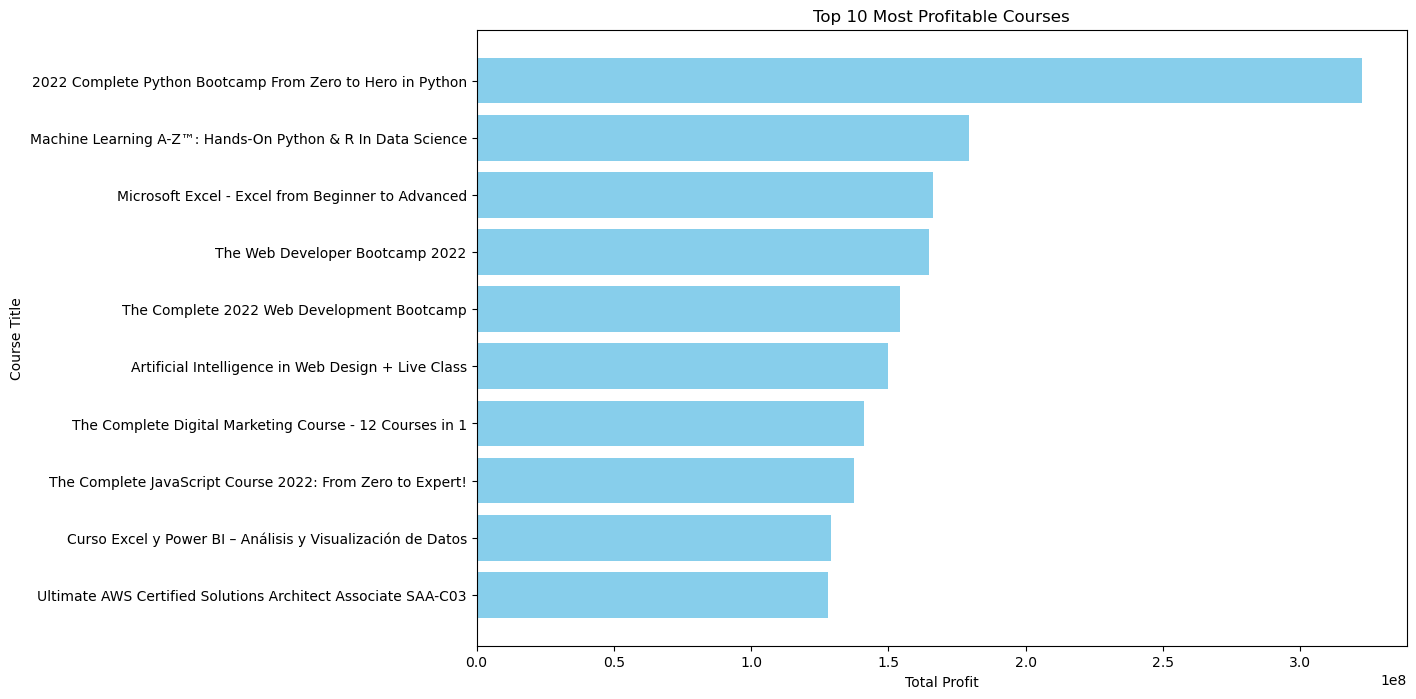

In [9]:
# draw fluctuation profit
# profit = price * num_sub
paid_course['profit'] = paid_course['num_subscribers'] * paid_course['price']
top_course = paid_course.groupby(['id', 'title'])['profit'].sum()
top_course = top_course.sort_values(ascending=False).head(10)
top_course = top_course.sort_values(ascending=True).head(10)

# plt.barh(top_course['profit'], top_course['title
plt.figure(figsize=(12, 8))
plt.barh(top_course.index.get_level_values('title'), top_course.values, color='skyblue')
plt.title('Top 10 Most Profitable Courses')
plt.xlabel('Total Profit')
plt.ylabel('Course Title')
plt.show()


1 khoa marketing -> khoa do dac biet 

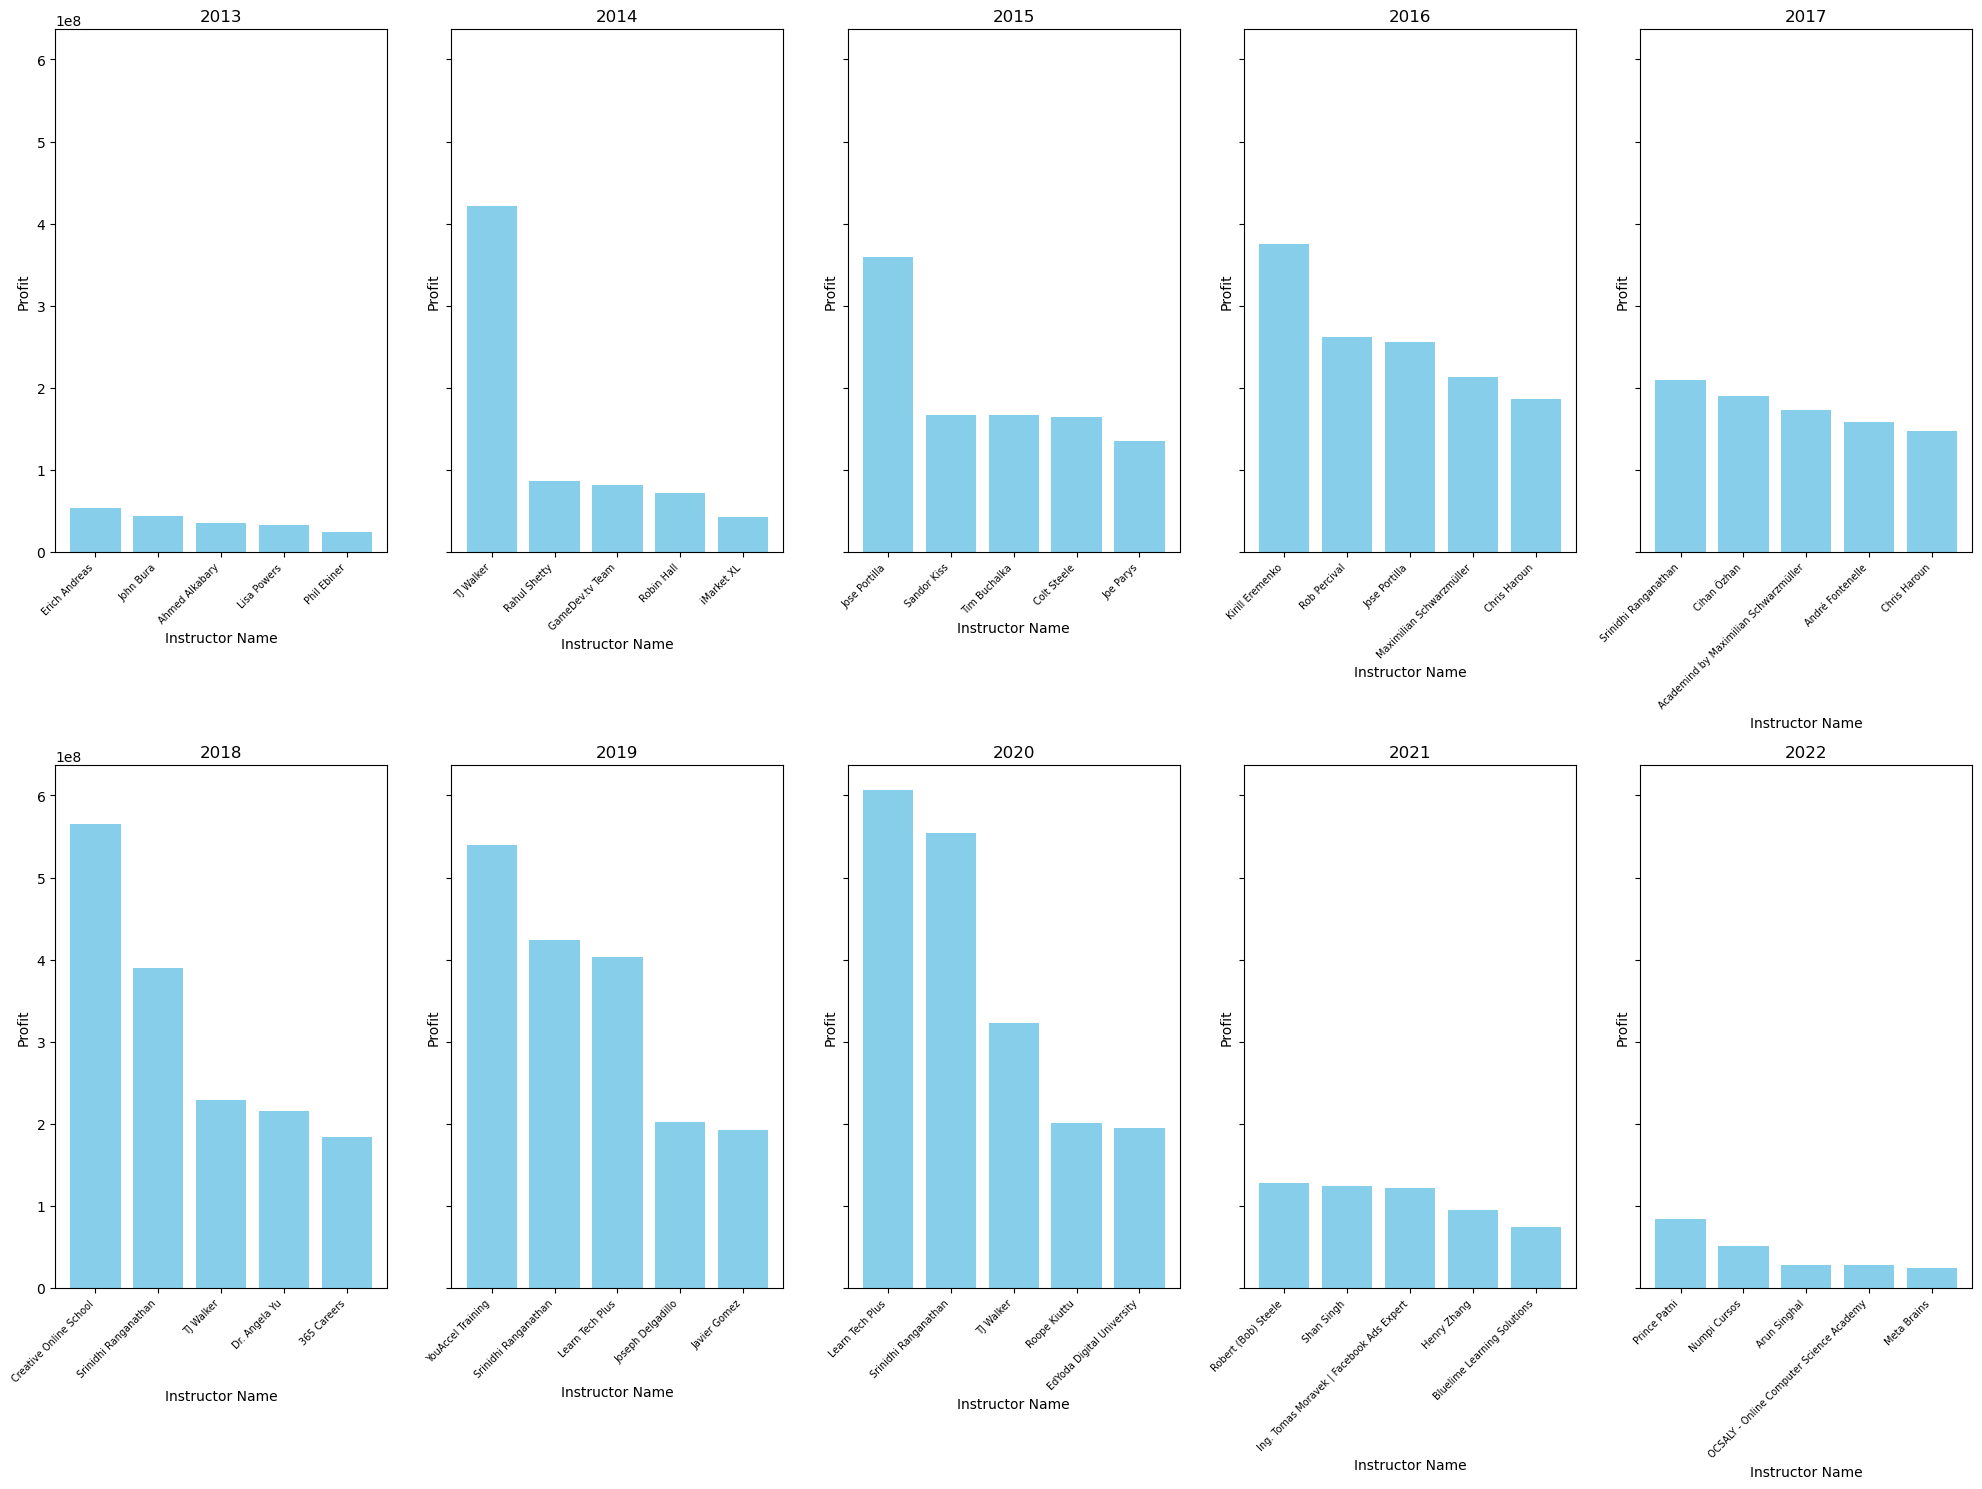

In [10]:
# instructor co profit cao nhat
filtered_data = paid_course[(paid_course['year'] >= 2013) & (paid_course['year'] <= 2022)]

instructor_profit_df = filtered_data.groupby(['instructor_name', 'instructor_url', 'year'])['profit'].sum().reset_index()
instructor_profit_df = instructor_profit_df.sort_values(by='profit', ascending=False)
top_instructors_by_year = instructor_profit_df.groupby('year').apply(lambda x: x.nlargest(5, 'profit')).reset_index(drop=True)
fig, axes = plt.subplots(2, 5, figsize=(20, 15), sharey=True)

for i, (year, data) in enumerate(top_instructors_by_year.groupby('year')):
    ax = axes[i // 5, i % 5]
    ax.bar(data['instructor_name'], data['profit'], color='skyblue')
    ax.set_title(f'{year}')
    ax.set_xlabel('Instructor Name')
    ax.set_ylabel('Profit')
    ax.set_xticklabels(data['instructor_name'], rotation=45, ha='right', fontsize=7) 

plt.tight_layout()
plt.show()

conclusion => ....